In [58]:
import openpyxl as px
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Light.ttc",size=12)
read_content = pd.read_excel('blue(19000篇).xlsx')

In [59]:
# 發文者數量統計
counts = read_content['作者'].value_counts()
print(counts)
# counts.to_csv('發文數量統計.csv')

kazusn ()                         1266
k09090806 (JY)                     475
hesione (我離開我自己)                   439
mdbm (Chaos)                       432
zeze (無尾貓)                         364
oblivionall (oblivion)             337
burgergirl (20 seconds insane)     311
qqqlisa (兔子蹦蹦跳跳)                   298
Astragali (Soldier A)              286
s00azure (大叔，愛が重い)                 257
eternalfall (不能飛所以墜落)              254
ktta (一手好牌)                        238
littlewren (wren)                  204
Llingjing (冷劍塵)                    200
zeze (籠中鳥)                         194
gossiplarry (賴瑞)                   192
p1026 (豬)                          181
viable (viable)                    179
fervorya (一丄上止正)                   177
yehz (葉子)                          173
epoch3004 (木字旁)                    171
ezk (蒲葵貓)                          171
lickmebaby (孤獨、混亂、失落感..)           156
DavidJam (平安是福)                    144
pinpo (孤獨患者)                       143
DavidJam (平安又有錢才是福)      

In [60]:
#總共發文人數
a = []
for i in counts:
    a.append(i)
print("總共發文人數:",len(a))

#只發過一篇人數
b = []
for k in a:
    if k == 1:
        b.append(k)
print("只發過一篇人數:",len(b))

總共發文人數: 2490
只發過一篇人數: 1258


(0, 1]          1258
(1, 10]          953
(10, 20]         131
(20, 30]          53
(30, 40]          26
(40, 50]          10
(50, 60]          12
(60, 70]           7
(70, 80]           2
(80, 90]           3
(90, 100]          1
(100, 200]        21
(200, 300]         6
(300, 400]         3
(400, 500]         3
(500, 1200]        0
(1200, 1300]       1
Name: 作者, dtype: int64


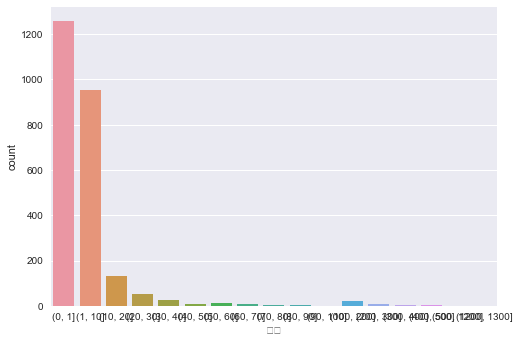

In [61]:
cut = pd.cut(counts, [0,1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,1200,1300])
cut2 = cut.value_counts(sort=False)
print(cut2)
# cut2.plot()
seaborn.countplot(cut)
plt.show()

/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:30: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


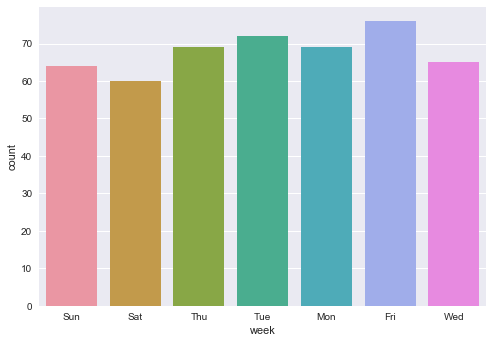

In [62]:
# 作者發文時間統計
author = read_content['作者']
time = read_content['時間'].convert_objects(convert_numeric = True)
mix = list(zip(author,time))

time2 = []
for k in mix:
    if k[0] =="k09090806 (JY)":
        time2.append(k[1])
    else:
        pass

week = []
time3 = [] #切開日期時間空白
for n in time2:
    time3.append(n.split(" "))
time4 = [] #切開時間冒號
for m in time3:
    week.append(m[0])
    if m[2] == "":
        time4.append(m[4].split(":"))
    else:
        time4.append(m[3].split(":"))
time5 = [] #取出小時
for v in time4:
    time5.append(v[0])
    
read_content['time'] = pd.DataFrame(time5)
read_content['week'] = pd.DataFrame(week)
read_content['time'] = read_content['time'].convert_objects(convert_numeric = True)

#合併時間跟星期
df1 = read_content['time']
df2 = read_content['week']
frames = [df1, df2]
result = pd.concat(frames,axis=1)

#計算兩欄dataframe的資料
result_1 = result.groupby(["time", "week"]).size()
# print(result_1)

# seaborn.countplot(x='time',data=read_content)
seaborn.countplot(x='week',data=read_content)
plt.show()

# x軸為星期,y軸為時間

In [63]:
read_content['time'].value_counts()

22.0    40
0.0     37
9.0     33
16.0    31
21.0    30
20.0    30
23.0    28
1.0     27
19.0    24
15.0    22
14.0    22
11.0    22
13.0    20
18.0    20
12.0    18
17.0    15
8.0     13
3.0     12
10.0    12
2.0     11
4.0      4
6.0      2
7.0      1
5.0      1
Name: time, dtype: int64

      Sun   Mon  Tue  Wed  Thur   Fri  Sat
0.0   7.0   5.0  3.0  3.0   6.0   5.0  8.0
1.0   3.0   5.0  4.0  4.0   2.0   8.0  1.0
2.0   2.0   2.0  1.0  2.0   1.0   1.0  2.0
3.0   3.0   1.0  1.0  1.0   4.0   0.0  2.0
4.0   0.0   0.0  1.0  0.0   2.0   1.0  0.0
5.0   0.0   0.0  0.0  0.0   1.0   0.0  0.0
6.0   0.0   0.0  0.0  2.0   0.0   0.0  0.0
7.0   0.0   0.0  0.0  0.0   0.0   1.0  0.0
8.0   0.0   4.0  3.0  3.0   1.0   2.0  0.0
9.0   0.0   5.0  8.0  6.0   7.0   7.0  0.0
10.0  0.0   1.0  2.0  3.0   0.0   4.0  2.0
11.0  3.0   4.0  3.0  3.0   2.0   5.0  2.0
12.0  2.0   2.0  4.0  2.0   2.0   2.0  4.0
13.0  6.0   2.0  2.0  1.0   6.0   1.0  2.0
14.0  4.0   3.0  3.0  4.0   4.0   2.0  2.0
15.0  2.0   2.0  3.0  5.0   6.0   2.0  2.0
16.0  2.0   6.0  8.0  4.0   4.0   4.0  3.0
17.0  1.0   0.0  4.0  2.0   3.0   2.0  3.0
18.0  4.0   4.0  3.0  4.0   3.0   0.0  2.0
19.0  4.0   4.0  3.0  0.0   3.0   4.0  6.0
20.0  4.0   4.0  5.0  3.0   2.0   4.0  8.0
21.0  4.0   4.0  3.0  5.0   3.0   6.0  5.0
22.0  6.0  

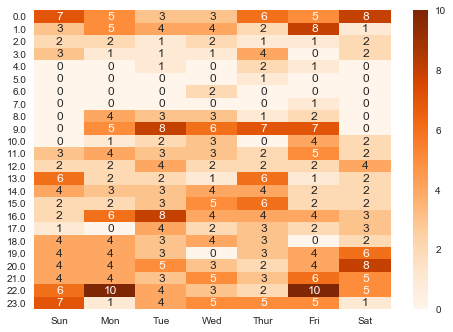

In [64]:
# seaborn.heatmap(x='week',y='time',data=read_content)
# result.plot(x='week',y='time')
# seaborn.countplot(result.groupby(["time", "week"]).size(),data=result)
# seaborn.lmplot(x='week',y='time',data=result)
# plt.show()
#發文的時間
all_counts=[]
week = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
# time = ['1.0','']
# subweek=read_content[read_content['week']=='Sunday']
for a in week:
    subweek=read_content[read_content['week']==a]
    all_counts.append(subweek['time'].value_counts().sort_index())
# print(all_counts)



weekday_hour=pd.concat(all_counts,keys=['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],axis=1)
weekday_hour.fillna(0,inplace=True)
print(weekday_hour)

seaborn.heatmap(weekday_hour, annot=True,cmap="Oranges")
plt.show()

In [65]:
sub=read_content[(read_content['作者']=='kazusn ()')]

In [66]:
sub['week'] = sub['時間'].str[0:3]
sub['week'] = sub['week'].convert_objects(convert_numeric=True)
print(type(sub['week'].value_counts()))
# c1
sub['time'] = sub['時間'].str[11:13]

<class 'pandas.core.series.Series'>


/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernel

In [67]:
import datetime
from dateutil.relativedelta import relativedelta
#datetime一般的時間計算
# d1 = datetime.datetime(2013,8,5,15,50,0)
# d2 = datetime.datetime(2013,8,4,21,9,0)
# print(u'相差：%s秒'%(d1-d2).seconds)

In [68]:
# 轉時間格式

read_content['時間'] = read_content['時間'].convert_objects(convert_numeric=True)
z = []
for ptt_datatime in time2:
    if ptt_datatime[8] == ' ':
        ptt_split_list = ptt_datatime.split(" ")
        ptt_year = ptt_split_list[-1]
        ptt_month = ptt_split_list[1]
        ptt_date = ptt_split_list[3]
        ptt_time = ptt_split_list[4]
        format_ptt_datetime = ptt_year+"-"+ptt_month+"-"+ptt_date+" "+ptt_time
        z.append(format_ptt_datetime)
    else:
        ptt_split_list = ptt_datatime.split(" ")
        ptt_year = ptt_split_list[-1]
        ptt_month = ptt_split_list[1]
        ptt_date = ptt_split_list[2]
        ptt_time = ptt_split_list[3]
        format_ptt_datetime = ptt_year+"-"+ptt_month+"-"+ptt_date+" "+ptt_time
        z.append(format_ptt_datetime)
# z = z.sort
z1 = z
z2 = z[1:]
z3 = list(zip(z1,z2))

/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [69]:
# 發文時間差

for item in z3:
#     print(item[11:17])
    d1 = datetime.datetime.strptime(item[0],"%Y-%b-%d %H:%M:%S") 
    d2 = datetime.datetime.strptime(item[1],"%Y-%b-%d %H:%M:%S")
    diff = relativedelta(d1,d2)
    print("相差 %d 年 %d 月 %d 天 %d 小時 %d 分鐘 %d 秒" % (diff.years, diff.months, diff.days, diff.hours, diff.minutes, diff.seconds))

相差 0 年 0 月 1 天 2 小時 43 分鐘 45 秒
相差 0 年 0 月 2 天 5 小時 53 分鐘 41 秒
相差 0 年 0 月 1 天 22 小時 20 分鐘 7 秒
相差 0 年 0 月 0 天 20 小時 52 分鐘 40 秒
相差 0 年 0 月 2 天 20 小時 44 分鐘 6 秒
相差 0 年 0 月 2 天 22 小時 22 分鐘 5 秒
相差 0 年 0 月 2 天 1 小時 31 分鐘 3 秒
相差 0 年 0 月 2 天 23 小時 53 分鐘 17 秒
相差 0 年 0 月 5 天 13 小時 16 分鐘 22 秒
相差 0 年 0 月 6 天 13 小時 50 分鐘 32 秒
相差 0 年 0 月 3 天 13 小時 29 分鐘 38 秒
相差 0 年 0 月 4 天 23 小時 38 分鐘 28 秒
相差 0 年 0 月 0 天 -19 小時 -51 分鐘 -34 秒
相差 0 年 0 月 2 天 23 小時 14 分鐘 23 秒
相差 0 年 0 月 2 天 1 小時 40 分鐘 23 秒
相差 0 年 0 月 2 天 1 小時 1 分鐘 32 秒
相差 0 年 0 月 4 天 4 小時 20 分鐘 28 秒
相差 0 年 0 月 3 天 19 小時 33 分鐘 56 秒
相差 0 年 0 月 0 天 5 小時 58 分鐘 41 秒
相差 0 年 0 月 0 天 16 小時 1 分鐘 32 秒
相差 0 年 0 月 0 天 0 小時 -34 分鐘 -30 秒
相差 0 年 0 月 0 天 -1 小時 0 分鐘 -5 秒
相差 0 年 0 月 4 天 8 小時 5 分鐘 35 秒
相差 0 年 0 月 1 天 0 小時 39 分鐘 46 秒
相差 0 年 0 月 5 天 1 小時 55 分鐘 5 秒
相差 0 年 0 月 1 天 19 小時 21 分鐘 33 秒
相差 0 年 0 月 0 天 -18 小時 -1 分鐘 -36 秒
相差 0 年 0 月 2 天 12 小時 42 分鐘 15 秒
相差 0 年 0 月 2 天 7 小時 13 分鐘 0 秒
相差 0 年 0 月 1 天 17 小時 6 分鐘 40 秒
相差 0 年 0 月 1 天 8 小時 17 分鐘 51 秒
相差 0 年 0 月 0 天 0 小時 -9 分鐘

/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


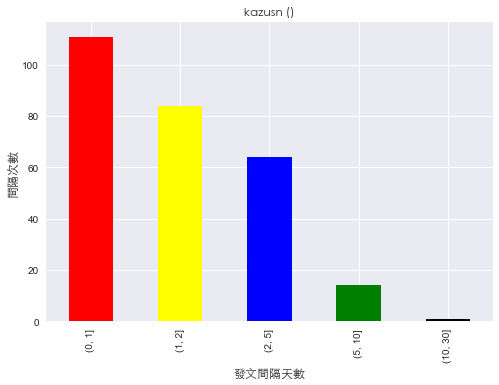

In [125]:
# 發文時間差：天,小時
hours = []
for item in z3:
#     print(item[11:17])
    d1 = datetime.datetime.strptime(item[0],"%Y-%b-%d %H:%M:%S") 
    d2 = datetime.datetime.strptime(item[1],"%Y-%b-%d %H:%M:%S")
    diff = relativedelta(d1,d2)
    hour = diff.years*365 + diff.months*30 + diff.days
    hours.append(hour)
# print(hours)
df = pd.DataFrame(np.array(hours).reshape(len(hours),1), columns = list("0"))
df['0'] = df['0'].convert_objects(convert_numeric = True)
df['0'] = pd.cut(df['0'], [0, 1, 2, 5, 10, 30])
hourcount = df['0'].value_counts(sort=False)
hourcount.plot(kind='bar',color=['red','yellow','blue','green','black'])
plt.xlabel('發文間隔天數',fontproperties=font)
plt.ylabel('間隔次數',fontproperties=font)
plt.title(u"kazusn ()",fontproperties=font)
# plt.savefig(filename="kazusn ().png",format="png")
plt.show()

In [49]:
# 取出所有人發文月份
read_content['season'] = read_content['時間'].str.split(" ").str[1]

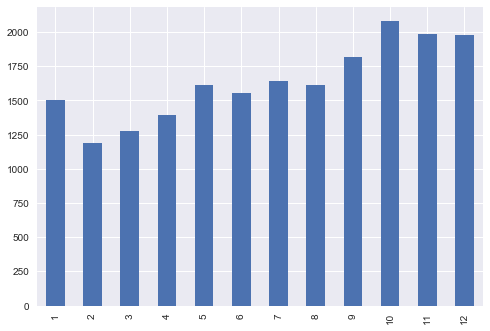

In [67]:
# 各月份發文平均
season = read_content['season'].value_counts()
season = season.drop(["(36.224.142.119),"])
season.rename(index={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12},inplace=True)
season = season.sort_index()
season.plot(kind='bar')
plt.show()

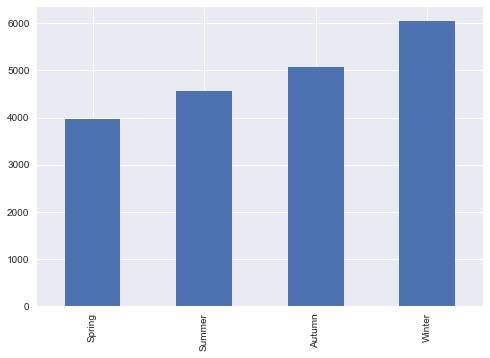

In [98]:
# 切成四季發文平均
read_content['season2'] = read_content['season']
read_content['season2'] = read_content['season2'].str.replace('Jan','Spring')
read_content['season2'] = read_content['season2'].str.replace('Feb','Spring')
read_content['season2'] = read_content['season2'].str.replace('Mar','Spring')
read_content['season2'] = read_content['season2'].str.replace('Apr','Summer')
read_content['season2'] = read_content['season2'].str.replace('May','Summer')
read_content['season2'] = read_content['season2'].str.replace('Jun','Summer')
read_content['season2'] = read_content['season2'].str.replace('Jul','Autumn')
read_content['season2'] = read_content['season2'].str.replace('Aug','Autumn')
read_content['season2'] = read_content['season2'].str.replace('Sep','Autumn')
read_content['season2'] = read_content['season2'].str.replace('Oct','Winter')
read_content['season2'] = read_content['season2'].str.replace('Nov','Winter')
read_content['season2'] = read_content['season2'].str.replace('Dec','Winter')
season2 = read_content['season2'].value_counts()
season2 = season2.drop(["(36.224.142.119),"])
season2 = season2.sort_values()
season2.plot(kind='bar')
plt.show()